In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [370]:
import pandas as pd
import numpy as np
import datetime
from sklearn.ensemble import RandomForestClassifier

#from matplotlib.colors import ListedColormap
#from sklearn import datasets, metrics, tree 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from subprocess import call
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

import xgboost as xgb

import seaborn as sns

from termcolor import colored



#from sklearn.ensemble import VotingClassifier
#from catboost import CatBoostClassifier
#import xgboost

from matplotlib.colors import ListedColormap
import matplotlib.dates as mdates

%pylab inline

pd.options.mode.chained_assignment = None  # default='warn'

Populating the interactive namespace from numpy and matplotlib


C:\Users\afecn\anaconda3.1\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['matrix', 'all', 'plot', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
feature = [
 'Cl/min_day',
 'Cl/max_day',
 'max_day-min_day',
 'ADX_5',
 'ADX_14',
 'ADX_28',
 'ADXR_5',
 'ADXR_14',
 'ADXR_28',
 'APO_5',
 'APO_14',
 'APO_28',
 'AROONOSC_5',
 'AROONOSC_14',
 'AROONOSC_28',
 'BOP_5',
 'BOP_14',
 'BOP_28',
 'CCI_5',
 'CCI_14',
 'CCI_28',
 'CMO_5',
 'CMO_14',
 'CMO_28',
 'DX_5',
 'DX_14',
 'DX_28',
 'MFI_5',
 'MFI_14',
 'MFI_28',
 'MINUS_DI_5',
 'MINUS_DI_14',
 'MINUS_DI_28',
 'MINUS_DM_5',
 'MINUS_DM_14',
 'MINUS_DM_28',
 'MOM_5',
 'MOM_14',
 'MOM_28',
 'PLUS_DI_5',
 'PLUS_DI_14',
 'PLUS_DI_28',
 'PLUS_DM_5',
 'PLUS_DM_14',
 'PLUS_DM_28',
 'PPO_5',
 'PPO_14',
 'PPO_28',
 'ROC_5',
 'ROC_14',
 'ROC_28',
 'ROCP_5',
 'ROCP_14',
 'ROCP_28',
 'ROCR_5',
 'ROCR_14',
 'ROCR_28',
 'ROCR100_5',
 'ROCR100_14',
 'ROCR100_28',
 'RSI_5',
 'RSI_14',
 'RSI_28',
 'TRIX_5',
 'TRIX_14',
 'TRIX_28',
 'ULTOSC_5',
 'ULTOSC_14',
 'ULTOSC_28',
 'WILLR_5',
 'WILLR_14',
 'WILLR_28',
 'HT_DCPERIOD_5',
 'HT_DCPERIOD_14',
 'HT_DCPERIOD_28',
 'HT_DCPHASE_5',
 'HT_DCPHASE_14',
 'HT_DCPHASE_28',
 'HT_TRENDMODE_5',
 'HT_TRENDMODE_14',
 'HT_TRENDMODE_28',
 'DEMA_5',
 'DEMA_14',
 'DEMA_28',
 'EMA_5',
 'EMA_14',
 'EMA_28',
 'HT_TRENDLINE_5',
 'HT_TRENDLINE_14',
 'HT_TRENDLINE_28',
 'KAMA_5',
 'KAMA_14',
 'KAMA_28',
 'MA_5',
 'MA_14',
 'MA_28',
 'MIDPOINT_5',
 'MIDPOINT_14',
 'MIDPOINT_28',
 'MIDPRICE_5',
 'MIDPRICE_14',
 'MIDPRICE_28',
 'SMA_5',
 'SMA_14',
 'SMA_28',
 'T3_5',
 'T3_14',
 'T3_28',
 'TEMA_5',
 'TEMA_14',
 'TEMA_28',
 'TRIMA_5',
 'TRIMA_14',
 'TRIMA_28',
 'WMA_5',
 'WMA_14',
 'WMA_28',
 'ATR_5',
 'ATR_14',
 'ATR_28',
 'NATR_5',
 'NATR_14',
 'NATR_28',
 'TRANGE_5',
 'TRANGE_14',
 'TRANGE_28',
 'AD_5',
 'AD_14',
 'AD_28',
 'ADOSC_5',
 'ADOSC_14',
 'ADOSC_28',
 'OBV_5',
 'OBV_14',
 'OBV_28',
 'AROON_aroondown',
 'AROON_aroonup',
 'MACD_macd',
 'MACD_macdsignal',
 'MACD_macdhist',
 'MACDEXT_macd',
 'MACDEXT_macdsignal',
 'MACDEXT_macdhist',
 'MACDFIX_macd',
 'MACDFIX_macdsignal',
 'MACDFIX_macdhist',
 'STOCH_slowk',
 'STOCH_slowd',
 'STOCHF_fastk',
 'STOCHF_fastd',
 'STOCHRSI_fastk',
 'STOCHRSI_fastd',
 'HT_PHASOR_inphase',
 'HT_PHASOR_quadrature',
 'HT_SINE_sine',
 'HT_SINE_leadsine',
 'BBANDS_upperband',
 'BBANDS_middleband',
 'BBANDS_lowerband',
 'MAMA_mama',
 'MAMA_fama',
 'Min10',
 'Min1000',
 'Min10_1300',
 'Min10_1000'
]

In [269]:

#разбивка датасетов
def dating(year):
    X_all_16 = X_all[                         (data[column] != year)]
    X_all_19 = X_all[                         (data[column] ==  year)]
    y_all_16 = y_all[                         (data[column] != year)]
    y_all_19 = y_all[                         (data[column] ==  year)]
    X_train, X_test, y_train, y_test = train_test_split(
    X_all_16,
    y_all_16, 
    test_size = 0.3,
    random_state = 1)
    return X_train, X_test, y_train, y_test, X_all_16, y_all_16, X_all_19, y_all_19 

#прогнозы
def result_(varP, varM):
    tablep = pd.pivot_table(
    matrix_year[(matrix_year['2proba']>=varP) &(matrix_year[column] >200)],                      
            margins=True, index=all, values = ['Target_','Profit_carrent'],
            aggfunc=['count', 'mean']).round(2)
    
    tablem = pd.pivot_table(
    matrix_year[(matrix_year['1proba']>varM) &(matrix_year[column] >200)],                      
            margins=True, index=all, values = ['Target_','Profit_carrent'],
            aggfunc=['count', 'mean']).round(2)
    table = pd.concat([tablep, tablem], axis=1)
#    table.columns = ['Profit%_c','Count','Profit%','Profit+-']
#    table.pop('Profit%_c')
    return table

def feat_():
    tablef = pd.pivot_table(
    matrix_year[(matrix_year[column] >200)],                      
            margins=True, index=all, values = 'f_' + X_train.columns,        
            aggfunc=['mean']).round(2)
    return tablef
    

In [270]:
%%time

# #TA+4block
TA_block4   = pd.read_csv('E:/Host/Data/Database/10min/TA_block4.csv',   parse_dates=['Date', 'Time'])
# #создать target
profit_TIME = pd.read_csv('E:/Host/Data/Database/10min/profit_TIME_1840.csv', parse_dates=['Date', 'Time'])

#TA+4block
#TA_block4   = pd.read_csv('TA_block4.csv', parse_dates=['Date', 'Time'])
#создать target
#profit_TIME = pd.read_csv('profit_TIME.csv', parse_dates=['Date', 'Time'])

Wall time: 37.1 s


In [271]:
aal = pd.merge(TA_block4, profit_TIME, on = ['Date', 'Time', 'Symbol'], how='inner')

In [17]:
aal[feature].corr()

,Min10,Min1000,Min10_1300,Min10_1000,Cl/min_day,Cl/max_day,max_day-min_day
Min10,1.000000,0.645652,0.808871,0.732875,0.365130,0.485598,-0.091536
Min1000,0.645652,1.000000,0.511548,0.441437,0.618628,0.659501,-0.037634
Min10_1300,0.808871,0.511548,1.000000,0.919664,0.265039,0.387334,-0.091952
Min10_1000,0.732875,0.441437,0.919664,1.000000,0.223722,0.338267,-0.085362
Cl/min_day,0.365130,0.618628,0.265039,0.223722,1.000000,0.011803,0.692593
Cl/max_day,0.485598,0.659501,0.387334,0.338267,0.011803,1.000000,-0.711181
max_day-min_day,-0.091536,-0.037634,-0.091952,-0.085362,0.692593,-0.711181,1.000000


In [272]:
Target_list = ['ProftLaBa', 'Proft1000', 'Proft1300', 'Proft1830', 'Profi_GEP', 'Pro_Morni',]


In [273]:
# к TA_block4 добавлаям профиты по отсечке
def shose(from_):
#     display(TA_block4   .shape)
#     display(profit_TIME.shape)
#    display(TA_block4[TA_block4['Time'] == from_].shape)
#    display(profit_TIME[profit_TIME['Time'] == from_].shape)

    df = pd.merge(TA_block4[TA_block4['Time'].dt.time == from_], profit_TIME[profit_TIME['Time'].dt.time == from_], on = ['Date', 'Time', 'Symbol'], how='inner')

#    display(df.shape)
    df.drop_duplicates(['Date', 'Time', 'Symbol'], inplace = True)
#    display(df.shape)
    df.dropna(inplace = True)
#    display(df)
    return(df)

In [274]:
%%time

# сама модель БЕЗ ВЫБОРА ФИЧЕЙ 

n_ = 2

feat_importances = pd.DataFrame()
matrix   = pd.DataFrame()
matrix_year_nul = pd.DataFrame()
matrix_2 = pd.DataFrame()
matrix_100 = pd.DataFrame()
matrix_2_100  = pd.DataFrame()
matrix_year   = pd.DataFrame()

matrix_year_h = pd.DataFrame()

forecast = pd.DataFrame()

for from_ in [datetime.time(10,50,0), datetime.time(11,50,0),datetime.time(12,50,0),datetime.time(13,50,0),datetime.time(14,50,0),datetime.time(15,50,0),datetime.time(16,50,0),]:
    data = shose(from_)
    data['Year'] = data ['Date'].dt.year
    column = 'Year'
    for Target in Target_list:
   #      data['Target_'] = np.where(data['Proft1300']>0.0, np.where(data['Proft1830']>-1,1,0),0)
        data['Target_'] = np.where(data[Target]>0.0, 1, 0)
        data['Profit_carrent'] = data[Target]
        for itera_2 in [0.4]:
            for itera_1 in [25]:
                for itera in [2]:
                    for year in [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]:

  #                      print(str(from_) + ' ' + str(Target) + ' ' + str(year) + ' ' + str(itera) + ' ' + str(itera_1) + ' ' + str(itera_2))

  #                      print('****')
                    



                        X_all = data[feature] 
                        y_all = data['Target_']    
                        X_train = X_all[(data[column] <  year)&(data[column] >= 2006)]
                        X_test  = X_all[data[column]  == year]
                        y_train = y_all[(data[column] <  year)&(data[column] >= 2006)]
                        y_test  = y_all[data[column]  == year]

#                        display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


                        model = RandomForestClassifier(n_estimators=itera_1, max_depth = itera, random_state=1, n_jobs = -1)
                        model.fit(X_train, y_train)
                        estimator = model.estimators_[0]

                        fi = pd.Series(model.feature_importances_).round(3)
                        fi1 = pd.concat([pd.Series(feature), fi], axis = 1)
    #                   display(fi1)
                        feat_importances = pd.concat([feat_importances, fi1], axis = 1)
    #                   display(feat_importances)


                        predictions_X_train     = model.predict(X_train)
                        predictions_X_test      = model.predict(X_test)
                        predictions_X_all       = model.predict(X_all)
                        predictions_proba_X_all = model.predict_proba(X_all)

                                    #Добавялем пробы в data.copy
                                    #data_copy = data.copy()
                        data['y_all'] =  y_all
                        data['predictions_X_all']  = predictions_X_all
                        for number_ in range(1, n_+1, 1):
                            data[str(number_)+'proba'] = predictions_proba_X_all[:, number_-1]


                        matrix_2018 = data[data[column]   == year]
                        matrix_2018 = matrix_2018.assign(itera_2 = str(itera_2),
                                                         Target  = str(Target),
                                                         itera_1   = str(itera_1),
                                                         itera   = str(itera),
                                                         from_   = str(from_)
                                                        )

                        matrix_year   = matrix_year.append(matrix_2018, ignore_index=True)

                
matrix_year['date_time'] = pd.to_datetime(matrix_year['Date'].astype(str) + " " + matrix_year['Time'].dt.time.astype(str)) # привести в порядок и создать новый столбец
matrix_year['proba2_range'] = \
                np.where(matrix_year['2proba']>0.55, 0.55,         
                np.where(matrix_year['2proba']>0.54, 0.54, 
                np.where(matrix_year['2proba']>0.53, 0.53,
                np.where(matrix_year['2proba']>0.52, 0.52, 
                np.where(matrix_year['2proba']>0.51, 0.51, 
                np.where(matrix_year['2proba']>0.50, 0.50, 0.49)))))) 

Wall time: 21min 38s


In [225]:
for oo in ['2']:
    ff = matrix_year[(matrix_year['Target'] == 'Proft1000')&(matrix_year['2proba'] >= 0.55)&(matrix_year['itera'] == oo)]
    display(confusion_matrix((ff['y_all']), (ff['predictions_X_all'])))
    display(accuracy_score  ((ff['y_all']), (ff['predictions_X_all'])))

array([[    0, 18041],
       [    0, 23404]], dtype=int64)

0.5647002050910845

In [226]:
fi1.sort_values(by = 1, ascending=False)

,0,1
1,Min1000,0.206
0,Min10,0.143
4,Cl/min_day,0.143
5,Cl/max_day,0.135
6,max_day-min_day,0.132
3,Min10_1000,0.128
2,Min10_1300,0.112


In [276]:
pd.options.display.max_rows=2000
all = ['Target'] 
result_(0.55,0.55)

count                   mean                  count  \
          Profit_carrent Target_ Profit_carrent Target_ Profit_carrent   
Target                                                                   
Pro_Morni            480     480          -0.63    0.45          14392   
Profi_GEP          48793   48793           0.13    0.57             26   
Proft1000          25453   25453           0.35    0.58            671   
Proft1300          16134   16134           0.31    0.55           1626   
Proft1830          11390   11390           0.12    0.52           1220   
ProftLaBa          12781   12781           0.21    0.56           3944   
All               115031  115031           0.21    0.57          21879   

                            mean          
          Target_ Profit_carrent Target_  
Target                                    
Pro_Morni   14392          -0.02    0.48  
Profi_GEP      26           0.19    0.50  
Proft1000     671          -0.33    0.48  
Proft1300    1626          -0.14    0.49  
Proft1830    1220           0.02    0.51  
ProftLaBa    3944          -0.11    0.46  
All         21879          -0.05    0.48

In [1]:
#пьяное пиво 2


pivo1 = pd.pivot_table(matrix_year[matrix_year['2proba'] > -0.55],
                      index=['Symbol', 'date_time', 'Time'],
                       values=['2proba'],
                       columns=['Target'],
                       aggfunc=['mean'],
                      # margins=True
                      )
pivo2 = pd.pivot_table(matrix_year[matrix_year['2proba'] > -0.55],
                      index=['Symbol', 'date_time', 'Time'],
                       values=['2proba', 'Pro_Morni', 'Profi_GEP', 'ProftLaBa', 'Proft1000','Proft1300','Proft1830', 'Min10',
 'Min1000',
 'Min10_1300',
 'Min10_1000',
 'Cl/min_day',
 'Cl/max_day',
 'max_day-min_day'],
                       
                       aggfunc=['mean'],
                      # margins=True
                      )
pivo3 = pd.concat([pivo1, pivo2], axis=1)

pivo3 = pivo3.reset_index()

pivo3.columns = ['Symbol',
 'date_time',
 'time',                
 '2proba_Pro_Morni',
 '2proba_Profi_GEP',
 '2proba_Proft1000',
 '2proba_Proft1300',
 '2proba_Proft1830',
 '2proba_ProftLaBa',
 '2proba',
 'Cl/max_day',
 'Cl/min_day',
 'Min10',
 'Min1000',
 'Min10_1000',
 'Min10_1300',
 'Pro_Morni',
 'Profi_GEP',
 'Proft1000',
 'Proft1300',
 'Proft1830',
 'ProftLaBa',
 'max_day-min_day']

pivo3['Year'] = pivo3['date_time'].dt.year

#еще комбинаторики 
pivo3['pr_comb'] = pivo3['Proft1300'].where(pivo3['Profi_GEP']<100, pivo3['Proft1000'])
pivo3



NameError: name 'pd' is not defined

In [293]:
%run library.ipynb

#УБРАТЬ СДВОЕННОСТИ DEF +комбинаторика (МИН ПРОБА БОЛЬШЕ 0,55 ДЛЯ 4 ТАРГЕТОВ)
tresh_comb = 0.55
time_ = datetime.time(12,50,0)
bezdouble(tresh_comb)

(8162, 14)

(4454, 14)

(1427, 15)

mean                                                    \
          Pro_Morni Profi_GEP Proft1000 Proft1300 Proft1830 ProftLaBa   
date_time                                                               
2010      -0.020472  0.135319  0.269756  0.249080  0.376509  0.135083   
2011      -0.189324  0.031482  0.191461  0.001000 -0.022629  0.157987   
2012       0.013371  0.061621  0.242292  0.256243  0.329954  0.180853   
2013       0.100457  0.196531  0.274087  0.374984  0.366932  0.077442   
2014      -0.038332  0.179961  0.280451  0.242199  0.474880  0.097469   
2015       0.218046  0.264124  0.425887  0.647402  0.561352  0.161447   
2016       0.021329  0.046798  0.355431  0.376004  0.505066  0.308796   
2017      -0.102901  0.129432  0.285188  0.182599  0.246697  0.156367   
2018       0.049196  0.118202  0.350323  0.402337  0.540417  0.233025   
2019       0.060784  0.185604  0.211246  0.270636  0.274592  0.025361   
2020       0.177194  0.266983  0.467741  0.654905  0.348158  0.196481   
All        0.018547  0.142937  0.302057  0.321742  0.360798  0.158511   

                        count                                          \
            pr_comb Pro_Morni Profi_GEP Proft1000 Proft1300 Proft1830   
date_time                                                               
2010       0.249080       222       222       222       222       222   
2011       0.001000       171       171       171       171       171   
2012       0.256243       120       120       120       120       120   
2013       0.374984        83        83        83        83        83   
2014       0.242199       124       124       124       124       124   
2015       0.647402       164       164       164       164       164   
2016       0.376004       109       109       109       109       109   
2017       0.182599       100       100       100       100       100   
2018       0.402337       133       133       133       133       133   
2019       0.270636       101       101       101       101       101   
2020       0.654905       100       100       100       100       100   
All        0.321742      1427      1427      1427      1427      1427   

                             
          ProftLaBa pr_comb  
date_time                    
2010            222     222  
2011            171     171  
2012            120     120  
2013             83      83  
2014            124     124  
2015            164     164  
2016            109     109  
2017            100     100  
2018            133     133  
2019            101     101  
2020            100     100  
All            1427    1427

In [403]:
tablep = pd.pivot_table(
matrix_year[(matrix_year['2proba']>=0.55) &(matrix_year['Target'] == 'Proft1300')&(matrix_year['Year'] > 2009)&(matrix_year['Time'] > '12:45:00')],                      
        margins=True, index='Symbol', values = ['Profit_carrent'],
        aggfunc=['count', 'mean']).round(2)
tablep.columns = [[ 'count','Proft',]]
tablep

,count,Proft
Symbol,,
GAZP,728,0.38
GMKN,918,0.38
LKOH,742,0.30
ROSN,869,0.19
SBER,970,0.56
VTBR,831,0.46
All,5058,0.38


In [341]:
#БЕЗ КОМБИНАТОРИКА И СДВОЕННОСТИ. СРедняя

tresh  = 0.55
#from__ = datetime.time(12,45,0)
from__ = '12:50:00'
ye     = 2010
ff_all = ['Proft1300']
#ff_all = ['Proft1000','Proft1300','Proft1830','ProftLaBa']

mean(tresh, from__, ye , ff_all)

'12:50:00'

0.55

'все'

'по дням'

'по 1 по часам'

,mean,count,mean,count,mean,count
,Proft1300,Proft1300,Proft1300,Proft1300,Proft1300,Proft1300
date_time,,,,,,
2010,0.194656,1168,0.091896,198,0.246192,198
2011,0.359214,709,-0.088230,144,0.018338,144
2012,0.205620,237,0.064781,82,0.183357,82
2013,0.687190,94,0.493945,48,0.433328,48
2014,0.340037,419,0.553231,90,0.726156,90
2015,0.671703,567,0.536462,128,0.710107,128
2016,0.356150,409,0.351507,93,0.382922,93
2017,0.129696,292,0.098920,94,0.204191,94


In [343]:

dfdf = dfdf.iloc[:, 1:3]
dfdf.columns= [['Proft', 'count']]
dfdf

,Proft,count
date_time,,
2010,0.229546,198
2011,0.061094,144
2012,0.215666,82
2013,0.449860,48
2014,0.776843,90
2015,0.687445,128
2016,0.373354,93
2017,0.240284,94
2018,0.562786,102


In [342]:
%%time

#СОРТИРОВКА ПО ВЕРОЯТНОСТИ
#proba_all  = ['2proba_Proft1000', '2proba_Proft1300', '2proba_Proft1830', '2proba_ProftLaBa']
proba_all  = ['2proba_Proft1300']
tresh  = 0.55
#time_  = datetime.time(12,50,0)
time_om__ = '10:50:00'
con    = pd.DataFrame()

dfdf = sort_var(proba_all, tresh, time_)


mean                      count            \
          2proba_Proft1300 Proft1300 2proba_Proft1300 Proft1300   
date_time                                                         
2010              0.560016  0.229546              198       198   
2011              0.560072  0.061094              144       144   
2012              0.562581  0.215666               82        82   
2013              0.558955  0.449860               48        48   
2014              0.562395  0.776843               90        90   
2015              0.561599  0.687445              128       128   
2016              0.565744  0.373354               93        93   
2017              0.563619  0.240284               94        94   
2018              0.559690  0.562786              102       102   
2019              0.565282  0.324134               76        76   
2020              0.563653  0.835575               86        86   
All               0.561887  0.405470             1141      1141   

                      mean                      count            
          2proba_Proft1300 Proft1300 2proba_Proft1300 Proft1300  
date_time                                                        
2010              0.556356  0.296034              198       198  
2011              0.556498 -0.022082              144       144  
2012              0.559045  0.136718               82        82  
2013              0.557880  0.387612               48        48  
2014              0.560484  0.624716               90        90  
2015              0.559110  0.662424              128       128  
2016              0.562405  0.356131               93        93  
2017              0.560705  0.210569               94        94  
2018              0.558693  0.393136              102       102  
2019              0.564331  0.437175               76        76  
2020              0.560198  0.750898               86        86  
All               0.559147  0.365541             1141      1141

Wall time: 584 ms


In [395]:
%run make_graf.ipynb

graf = buy_hold()
#graf
proba_all  = '2proba_Proft1000'
tresh  = 0.55
time_  = datetime.time(12,45,0)
graf_my = my_graf(proba_all)
# display(graf_my.shape)
display(graf_my.agg(['mean', 'count']))
#graf_my['Date'] = graf_my.index.get_level_values(level=0)
#graf_my

,2proba_Proft1000,Proft1000,Date
mean,0.576342,0.301964,NaN
count,1743.000000,1743.000000,1743.0


In [406]:
plot_merg['VTBR_pr'].sum()

-19.925418863231005

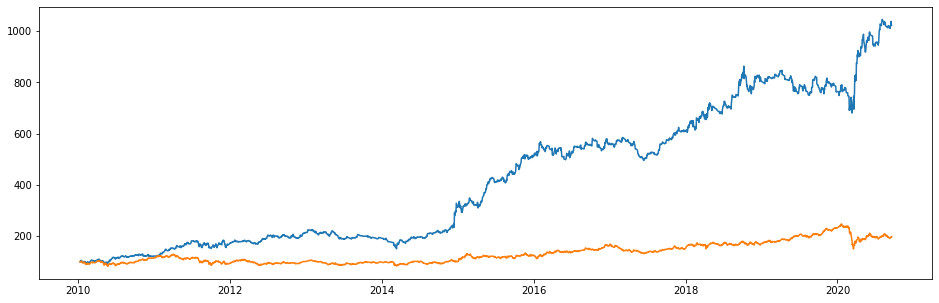

In [401]:
graf_my['Date'] = pd.to_datetime(graf_my['Date'])
plot_merg = pd.merge(graf_my, graf, on = 'Date', how = 'right', )
#
plot_merg.sort_values(by = 'Date', inplace = True)
plot_merg.fillna(0, inplace = True)

plot_merg = plot_merg.reset_index()

plot_merg['equity'] = nan
plot_merg['equity_my'] = nan
plot_merg['equity_my_0.1'] = nan
plot_merg['equity'][0]    = 100
plot_merg['equity_my'][0] = 100
plot_merg['equity_my_0.1'][0] = 100

for ii in range(1, len(plot_merg),1): 
    plot_merg['equity']   [ii]     = (1+plot_merg['mean']                            [ii]/100)*plot_merg['equity']   [ii-1]
    plot_merg['equity_my'][ii]     = (1+plot_merg[str.split(proba_all, sep = '_')[1]][ii]/100)*plot_merg['equity_my'][ii-1]
    plot_merg['equity_my_0.1'][ii] = (1-0.001+plot_merg[str.split(proba_all, sep = '_')[1]][ii]/100)*plot_merg['equity_my_0.1'][ii-1]
    
#plot_merg.to_excel('dfd1.xlsx')
plt.figure(figsize=(16,5))

# plt.plot(plot_merg['Date'], plot_merg['equity_my'][:])
plt.plot(plot_merg['Date'], plot_merg['equity_my_0.1'][:])
plt.plot(plot_merg['Date'],plot_merg['equity'])
#plt.xlim([2010,2020])
#plt.yscale(plot_merg['equity'])
plt.show()

In [2]:
profit_TIME[(profit_TIME['Date'].dt.year > 2009)&(profit_TIME['Symbol'] == 'VTBR')]

NameError: name 'profit_TIME' is not defined

In [380]:
plot_merg

,index,2proba_Proft1000,Proft1000,Date,GAZP,GMKN,LKOH,ROSN,SBER,VTBR,GAZP_pr,GMKN_pr,LKOH_pr,ROSN_pr,SBER_pr,VTBR_pr,mean,equity,equity_my,equity_my-
0,0,0.601052,0.713357,2010-01-11,194.50,4695.40,1750.98,271.70,86.69,0.072600,7.044579,10.633064,3.727356,8.247012,5.965041,4.310345,6.654566,100.000000,1.000000e+02,9.980000e+01
1,1,0.596551,-1.089918,2010-01-12,191.80,4640.06,1719.82,266.52,85.00,0.072700,-1.388175,-1.178600,-1.779575,-1.906515,-1.949475,0.137741,-1.344100,98.655900,1.005966e+02,1.003966e+02
2,2,0.592389,2.560815,2010-01-13,189.30,4654.14,1709.44,267.54,86.61,0.074400,-1.303441,0.303444,-0.603552,0.382710,1.894118,2.338377,0.501943,99.151096,1.011925e+02,1.009925e+02
3,3,0.575556,2.007769,2010-01-14,190.83,4892.94,1726.80,268.00,87.55,0.074300,0.808241,5.130916,1.015537,0.171937,1.085325,-0.134409,1.346258,100.485926,1.017749e+02,1.015749e+02
4,4,0.571136,-0.133511,2010-01-15,187.86,4884.62,1731.95,268.50,88.15,0.074600,-1.556359,-0.170041,0.298240,0.186567,0.685323,0.403769,-0.025417,100.460385,1.023562e+02,1.021562e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2676,1740,0.569301,1.219719,2020-09-11,177.94,19378.00,4734.50,371.45,220.53,0.035380,2.105928,-1.853728,1.337757,0.691244,-0.608437,0.155697,0.304744,192.969689,2.201274e+06,2.201274e+06
2677,2679,0.000000,0.000000,2020-09-14,177.60,19478.00,4736.00,372.60,227.07,0.035680,-0.191076,0.516049,0.031682,0.309598,2.965583,0.847937,0.746629,194.410456,2.201274e+06,2.201274e+06
2678,1741,0.588820,1.810470,2020-09-15,182.85,19582.00,4876.00,384.60,231.30,0.036075,2.956081,0.533936,2.956081,3.220612,1.862862,1.107063,2.106106,198.504946,2.214236e+06,2.214236e+06
2679,1742,0.552936,-1.259160,2020-09-16,183.80,19272.00,4847.50,384.30,231.35,0.035805,0.519552,-1.583087,-0.584495,-0.078003,0.021617,-0.748441,-0.408810,197.693438,2.226479e+06,2.226479e+06
